In [6]:
seed = 22

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from sklearn import metrics

import matplotlib.pyplot as plt
import sklearn.metrics as sklearn_metrics

np.random.seed(seed)

In [7]:
def silhouette_score(X, labels):
    """Wrapper function of Scikit-learn's silhouette_score. The only difference is it doesn't throw an error where there is only one label."""
  
    if len(set(labels)) == 1:
        return float("NaN")
    else:
        return sklearn_metrics.silhouette_score(X, labels)

In [8]:
data = pd.read_csv('data/project_dataset.csv',low_memory=False)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.108420,0.629539,-0.320437,-0.120785,-0.398424,-0.202614,-0.456569,0.441789,0.004905,0.390798,...,0.543323,0.384518,0.567156,-0.225841,0.510636,-0.467787,0.475940,0.183181,-0.217281,0.573872
1,0.140912,0.693322,-0.343662,-0.100846,-0.476249,-0.184669,-0.343302,0.249432,-0.046037,0.261371,...,0.549115,0.190874,0.532151,-0.226447,0.441830,-0.336036,0.281762,0.113103,-0.257302,0.440154
2,0.111089,0.565909,-0.336946,-0.092571,-0.488653,-0.169434,-0.437786,0.367724,-0.059495,0.347600,...,0.650597,0.237244,0.533808,-0.128006,0.551713,-0.376537,0.404871,0.150581,-0.252151,0.390916
3,0.030166,0.629900,-0.345893,-0.094315,-0.487779,-0.001616,-0.499513,0.219282,-0.102872,0.259045,...,0.681445,0.174268,0.438605,-0.053265,0.590292,-0.373104,0.182493,0.180408,-0.437179,0.361505
4,0.182141,0.707768,-0.366220,0.265800,-0.658817,0.083475,-0.751077,0.418466,-0.124584,0.372935,...,0.396563,0.269146,0.356989,-0.162685,0.276632,-0.444224,0.275936,0.287429,-0.276891,0.390033


In [14]:
# find optimal K using silhouette scores
silhouette_scores = []

K = [2, 3, 4, 5, 6]
for n_clusters in K:
    kmeans = KMeans(init="random",n_clusters=n_clusters, random_state=seed, n_init=20, max_iter=500)
    cluster_labels = kmeans.fit_predict(data)

    # Compute silhouette scores
    #silhouette_avg = silhouette_score(data, cluster_labels,  metric="euclidean",sample_size=500)

    silhouette_avg = metrics.silhouette_score(data, cluster_labels,  metric="euclidean",sample_size=500)
    
    print(f"For n_clusters = {n_clusters}, silhouette score is: {silhouette_avg:.4f}")
    
    silhouette_scores.append(silhouette_avg)

For n_clusters = 2, silhouette score is: 0.1073
For n_clusters = 3, silhouette score is: 0.0968
For n_clusters = 4, silhouette score is: 0.0872
For n_clusters = 5, silhouette score is: 0.0902
For n_clusters = 6, silhouette score is: 0.0668


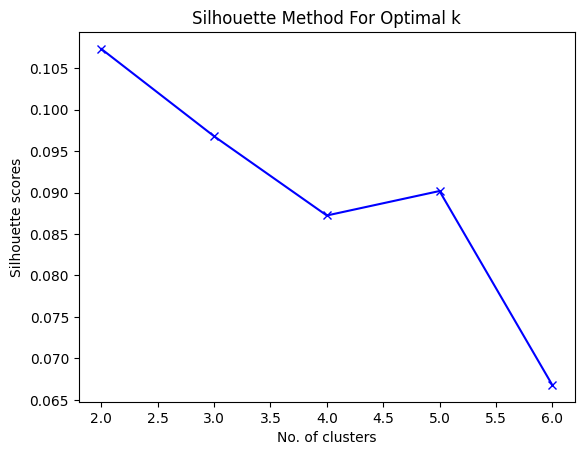

In [15]:
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette scores')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [16]:
best_k = np.nanargmax(silhouette_scores)+2

In [17]:
print("The best K value for silhouette method is:",best_k)

The best K value for silhouette method is: 2


In [18]:
kmeans = KMeans(n_clusters=best_k, random_state=seed, n_init=20, max_iter=500).fit(data)

In [19]:
clustered_data =  pd.DataFrame()
clustered_data['cluster'] = pd.Categorical(kmeans.labels_)

In [20]:
clustered_data = clustered_data.reset_index()
clustered_data = clustered_data.rename(columns={"index":"index"})

In [21]:
clustered_data.to_csv('data/cluster_index_KMeans.csv',index=False)

In [22]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

In [23]:
cols = [*range(300)]
cols = map(str, cols)
cols = list(cols)
cols = map(lambda c : 'col'+c,cols)
cols = list(cols)

In [24]:
centroids.columns=cols

In [25]:
centroids.to_csv('data/kmeans_centroids.csv',index=False)